In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sbrn

df = sbrn.load_dataset("titanic")
df.sample(4)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
534,0,3,female,30.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
648,0,3,male,NaN,0,0,7.5500,S,Third,man,True,NaN,Southampton,no,True
594,0,2,male,37.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.shape

(891, 15)

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='survived', ylabel='count'>

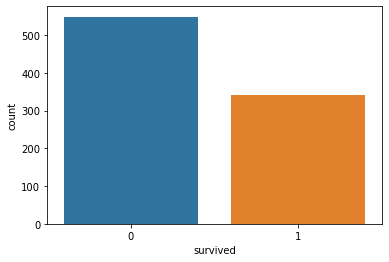

In [6]:
sbrn.countplot(x = "survived", data = df)

In [7]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
df.groupby("sex").survived.mean() * 100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [9]:
df.groupby("pclass").survived.mean() * 100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [10]:
df[df.sibsp == 0].survived.mean() * 100

34.53947368421053

In [11]:
df[df.sibsp >= 1].survived.mean() * 100

46.64310954063604

In [12]:
df[df.parch == 0].survived.mean() * 100

34.365781710914455

In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
451,0,3,male,NaN,1,0,19.9667,S,Third,man,True,NaN,Southampton,no,False
505,0,1,male,18.0,1,0,108.9000,C,First,man,True,C,Cherbourg,no,False
42,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True


In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [16]:
df = df.drop(["class", "deck","who","alive","alone","adult_male","embark_town"], axis = 1)
df = df.dropna(subset =['embarked', 'age'])


In [17]:
df.sample(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
687,0,3,male,19.0,0,0,10.1708,S
558,1,1,female,39.0,1,1,79.6500,S
83,0,1,male,28.0,0,0,47.1000,S
665,0,2,male,32.0,2,0,73.5000,S
162,0,3,male,26.0,0,0,7.7750,S


In [18]:
from sklearn.preprocessing import LabelEncoder
LABEC = LabelEncoder()

df["sex"]= LABEC.fit_transform(df.iloc[:,2].values)


In [19]:
df.iloc[:,7]= LABEC.fit_transform(df.iloc[:,7].values)

In [20]:
df['sex'].unique()

array([1, 0])

In [21]:
df["embarked"].unique()

array([2, 0, 1])

In [22]:
df.sample(3)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
169,0,3,1,28.0,0,0,56.4958,2
84,1,2,0,17.0,0,0,10.5000,2
391,1,3,1,21.0,0,0,7.7958,2


In [23]:
XS = df[["pclass","sex","age","sibsp","parch","fare","embarked"]]
Y = df["survived"]

XS.sample(2)


,pclass,sex,age,sibsp,parch,fare,embarked
177,1,0,50.0,0,0,28.7125,0
111,3,0,14.5,1,0,14.4542,0


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(XS , Y, test_size = 0.22, random_state = 1)


In [25]:
from sklearn.linear_model import LogisticRegression

LOGST = LogisticRegression(random_state = 42, max_iter = 1000)
LOGST.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [26]:
y_output_prediction = LOGST.predict(x_test)
y_output_prediction


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [27]:
new_df = pd.DataFrame({"Actual Values" : y_test, "Predicted Values" : y_output_prediction})
new_df.sample(10)


,Actual Values,Predicted Values
225,0,0
137,0,0
357,0,1
702,0,1
523,1,1
554,1,1
233,1,0
608,1,1
883,0,0
808,0,0


# Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score, classification_report
Accuracy = accuracy_score(y_test, y_output_prediction)

print("The AcCuRacy Of THis Model is  : {}".format(float(Accuracy) * 100) + str("%"))  ; print()
print('CLassification Report :{}'.format(classification_report(y_test, y_output_prediction, zero_division = 1)))

The AcCuRacy Of THis Model is  : 78.343949044586%

CLassification Report :              precision    recall  f1-score   support

           0       0.82      0.81      0.82        93
           1       0.73      0.75      0.74        64

    accuracy                           0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



# A Simple Math POint!!

so guys as we know all, SigMoid Function is The Only , responsible for generating this pattern of numbers between 0 and 1, its a something very necessary . It helps us , to build this classification, and Based On That we Made Some Predictions !!.


# The SigMoid Function 

In [29]:
from math import exp

def SigMoid(x) : 
    return 1 / (1 + exp(- x))
print(SigMoid(476))


1.0


# Lets Do Some Maths Here !!!

logistic Function : 

$$p(y=1|x; \theta) = \frac{1}{1 + e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2}}$$


Logistic ReGression EQuation : 
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ 


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_output_prediction)


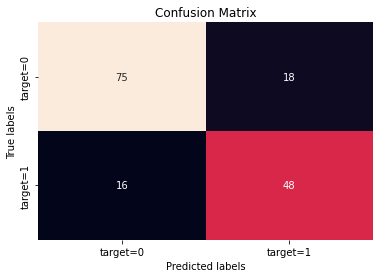

In [31]:
ax = plt.subplot()
sbrn.heatmap(cm, annot=True, ax = ax, cbar=False)


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()


In [32]:
TN,TP,FN,FP = 75, 48, 16,18

In [33]:
AccuracyPure = (TN + TP) / (TN + TP + FP + FN) * 100
print("The ACcuRacy Of This Model is  : {}".format(float(AccuracyPure) * 100) + str("%"))

The ACcuRacy Of This Model is  : 7834.3949044586%
